In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
#run this if doesn work in terminal
#pip install pandas numpy matplotlib seaborn scikit-learn
#Load the dataset
data = pd.read_csv('data/raw/global_air_pollution_data.csv')


In [13]:
# Display the first few rows
print(data.head())

         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moderate   
1              Brazil  Presidente Dutra         41         Good   
2               Italy   Priolo Gargallo         66     Moderate   
3              Poland         Przasnysz         34         Good   
4              France          Punaauia         22         Good   

   co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
0               1            Good               36               Good   
1               1            Good                5               Good   
2               1            Good               39               Good   
3               1            Good               34               Good   
4               0            Good               22               Good   

   no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0              0             Good               51           Moderate  
1             

In [14]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None


In [15]:
# Check for missing values
print(data.isnull().sum())

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value\t          0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64


In [16]:
# Summary statistics
print(data.describe())

          aqi_value  co_aqi_value\t  ozone_aqi_value  no2_aqi_value  \
count  23463.000000    23463.000000     23463.000000   23463.000000   
mean      72.010868        1.368367        35.193709       3.063334   
std       56.055220        1.832064        28.098723       5.254108   
min        6.000000        0.000000         0.000000       0.000000   
25%       39.000000        1.000000        21.000000       0.000000   
50%       55.000000        1.000000        31.000000       1.000000   
75%       79.000000        1.000000        40.000000       4.000000   
max      500.000000      133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [17]:
# Summary statistics
print(data.describe())

          aqi_value  co_aqi_value\t  ozone_aqi_value  no2_aqi_value  \
count  23463.000000    23463.000000     23463.000000   23463.000000   
mean      72.010868        1.368367        35.193709       3.063334   
std       56.055220        1.832064        28.098723       5.254108   
min        6.000000        0.000000         0.000000       0.000000   
25%       39.000000        1.000000        21.000000       0.000000   
50%       55.000000        1.000000        31.000000       1.000000   
75%       79.000000        1.000000        40.000000       4.000000   
max      500.000000      133.000000       235.000000      91.000000   

       pm2.5_aqi_value  
count     23463.000000  
mean         68.519755  
std          54.796443  
min           0.000000  
25%          35.000000  
50%          54.000000  
75%          79.000000  
max         500.000000  


In [19]:
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Verify that there are no missing values left in numeric columns
print(data[numeric_cols].isnull().sum())

aqi_value          0
co_aqi_value\t     0
ozone_aqi_value    0
no2_aqi_value      0
pm2.5_aqi_value    0
dtype: int64


In [20]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [22]:
# Print column names to verify the existence of 'date'
print(data.columns)

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')


In [24]:
# Convert data types if necessary (update based on your dataset)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
elif 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
else:
    print("Date column not found in the dataset")

# Display the first few rows to verify changes
print(data.head())

Date column not found in the dataset
         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moderate   
1              Brazil  Presidente Dutra         41         Good   
2               Italy   Priolo Gargallo         66     Moderate   
3              Poland         Przasnysz         34         Good   
4              France          Punaauia         22         Good   

   co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
0               1            Good               36               Good   
1               1            Good                5               Good   
2               1            Good               39               Good   
3               1            Good               34               Good   
4               0            Good               22               Good   

   no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0              0             Good               5

/Users/puspakirana/Documents/air-quality-analysis/env/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/puspakirana/Documents/air-quality-analysis/env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


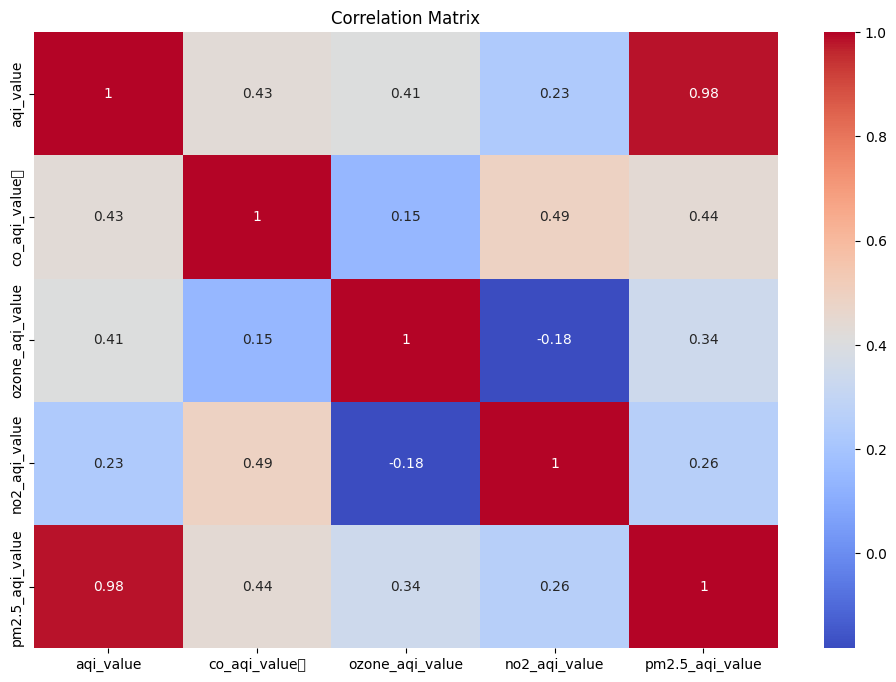

In [25]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include='number')

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Explanation of the Correlation Matrix

A correlation matrix is a table showing correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1.

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

### Result heatmap:

Diagonal Values: These are all 1.0 because a variable is always perfectly correlated with itself.
Off-Diagonal Values: These show the pairwise correlations between different variables.

### Interpretation of the Heatmap

1.	Strong Positive Correlations (close to 1):
	aqi_value and pm2.5_aqi_value (0.98): This strong positive correlation indicates that as pm2.5_aqi_value increases, the aqi_value also increases significantly. PM2.5 (particulate matter with diameter less than 2.5 micrometers) is a major component of air pollution and heavily influences the Air Quality Index (AQI).co_aqi_value and no2_aqi_value (0.49): Carbon monoxide and nitrogen dioxide show a moderate positive correlation, suggesting they often increase or decrease together.

2.	Moderate Positive Correlations (0.3 to 0.5):
	co_aqi_value and pm2.5_aqi_value (0.44): This suggests that there is a moderate relationship between carbon monoxide and PM2.5 levels.
	ozone_aqi_value and co_aqi_value (0.15): Although lower, there is still a noticeable correlation indicating these pollutants can sometimes increase or decrease together.

3.	Weak or Negative Correlations (close to 0 or negative)
	no2_aqi_value and ozone_aqi_value (-0.18): A negative correlation here suggests that these two pollutants might often be inversely related; when one is high, the other might be low.

### Insights

1. Impact on AQI: The pm2.5_aqi_value has the highest impact on the overall aqi_value, indicating it is the primary pollutant driving the AQI values in your dataset.
2. Pairwise Relations: The positive correlation between co_aqi_value and no2_aqi_value suggests that these pollutants often come from similar sources or conditions, such as traffic emissions.
3. Inverse Relationships: The negative correlation between ozone_aqi_value and no2_aqi_value can be indicative of complex chemical interactions in the atmosphere where the presence of one can reduce the other.


## PM2.5 Analysis

In [30]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data/raw/global_air_pollution_data.csv')

# Display basic information
print(data.info())

# Handle missing values (example: filling missing values with mean for numeric columns only)
numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Convert date column to datetime format if it exists
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
elif 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
else:
    print("Date column not found in the dataset")

# Verify data cleaning
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB
None
Date column not found in the dataset
         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moder

#### Distribution Analysis
Understand the distribution of PM2.5 concentrations.

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
print(data.head())

         country_name         city_name  aqi_value aqi_category  \
0  Russian Federation        Praskoveya         51     Moderate   
1              Brazil  Presidente Dutra         41         Good   
2               Italy   Priolo Gargallo         66     Moderate   
3              Poland         Przasnysz         34         Good   
4              France          Punaauia         22         Good   

   co_aqi_value\t co_aqi_category  ozone_aqi_value ozone_aqi_category  \
0               1            Good               36               Good   
1               1            Good                5               Good   
2               1            Good               39               Good   
3               1            Good               34               Good   
4               0            Good               22               Good   

   no2_aqi_value no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0              0             Good               51           Moderate  
1             